# Prophet

Prophet es una librería de Python desarrollada por Facebook para hacer predicciones de series de tiempo.

https://becominghuman.ai/unlocking-the-power-of-time-series-forecasting-a-step-by-step-guide-with-code-examples-in-python-30447ba863b5

![](prophet.png)

La librería Prophet no utiliza redes neuronales. Prophet se basa en un modelo estadístico no paramétrico denominado **modelo de suavizado exponencial de tendencia**. Este modelo se utiliza para modelar el comportamiento de una serie temporal en función de tres componentes: la tendencia, los ciclos sazonales y los eventos puntuales.

08:58:25 - cmdstanpy - INFO - Chain [1] start processing
08:58:25 - cmdstanpy - INFO - Chain [1] done processing


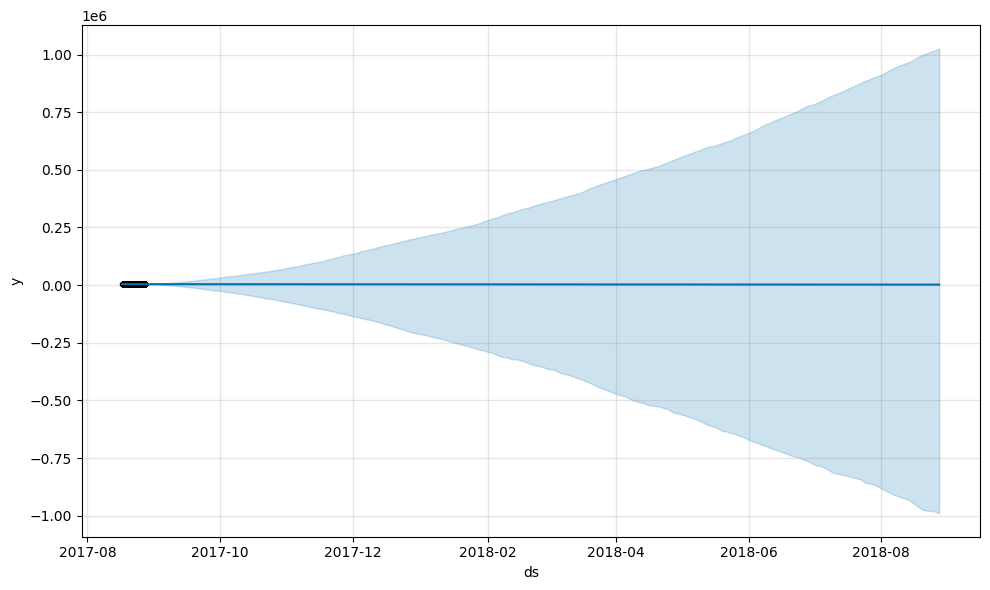

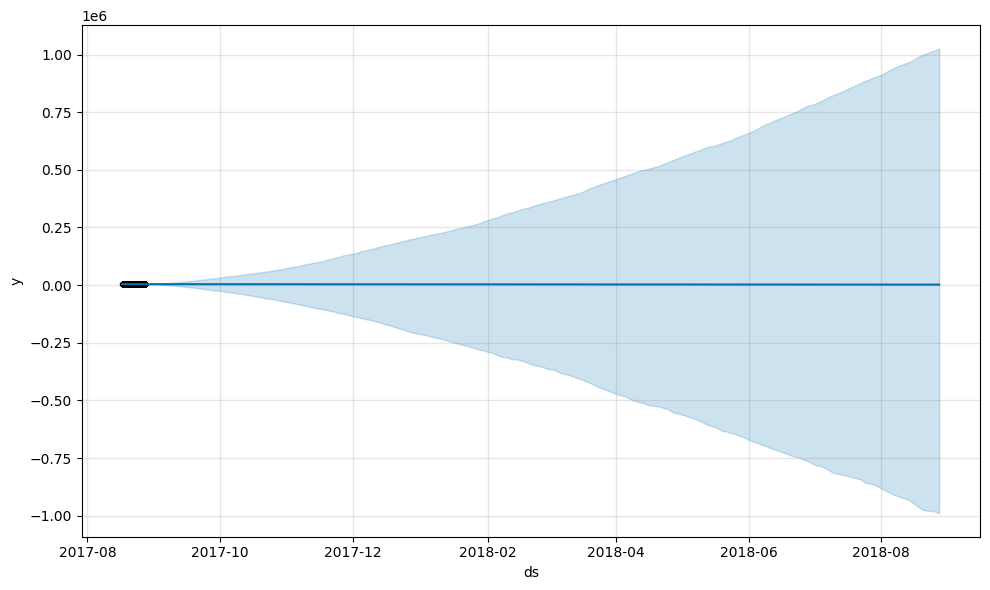

In [9]:
# pip install prophet
from prophet import Prophet
import pandas as pd

# Load the time series data 
data = pd.read_csv("bitcoin1000.csv")

# Prepare su conjunto de datos, con una columna "ds" que contenga las fechas y una columna "y" que contenga los valores a predecir.
data = data.rename(columns={"time": "ds", "price": "y"}) 

# Fit the Prophet model
# Cree una instancia de Prophet 
model = Prophet()
# Entrene el modelo con su conjunto de datos
model.fit(data)

# Cree un DataFrame para hacer predicciones
future = model.make_future_dataframe(periods=365) # "periods" es el número de períodos en el futuro que desea predecir.

# Haga las predicciones
forecast = model.predict(future)

# Grafique las predicciones
model.plot(forecast)

Ten en cuenta que Prophet es un modelo de series de tiempo con un enfoque estadístico, por lo que es importante revisar los datos para estacionariedad y eliminar tendencias y sazonalidad antes de usarlo. Además, Prophet tiene una serie de parámetros y opciones avanzadas que te pueden ayudar a mejorar las predicciones, como incluir regresores exógenos, cambios puntuales y cambios de tendencia.

 - La **estacionariedad** (stationarity) se refiere a la propiedad de una serie temporal de tener un comportamiento constante en el tiempo. Es decir, si una serie temporal es estacionaria, significa que su media, varianza y distribución de probabilidad son constantes a lo largo del tiempo.

 - La **sazonalidad** (seasonality) se refiere a patrones periódicos en una serie temporal, que se repiten en intervalos regulares, como días, semanas, meses o años. Por ejemplo, las ventas de una tienda pueden ser más altas durante las vacaciones de verano y más bajas durante los meses de invierno.

In [10]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 04:00:00,4339.493719,4272.427437,4.391910e+03,4339.493719,4.339494e+03,-8.412850,-8.412850,-8.412850,-8.412850,-8.412850,-8.412850,0.0,0.0,0.0,4331.080870
1,2017-08-17 04:15:00,4340.742369,4270.856076,4.388668e+03,4340.742369,4.340742e+03,-11.033210,-11.033210,-11.033210,-11.033210,-11.033210,-11.033210,0.0,0.0,0.0,4329.709158
2,2017-08-17 04:30:00,4341.991018,4266.861097,4.384171e+03,4341.991018,4.341991e+03,-13.709879,-13.709879,-13.709879,-13.709879,-13.709879,-13.709879,0.0,0.0,0.0,4328.281139
3,2017-08-17 04:45:00,4343.239667,4270.248529,4.384481e+03,4343.239667,4.343240e+03,-16.375998,-16.375998,-16.375998,-16.375998,-16.375998,-16.375998,0.0,0.0,0.0,4326.863669
4,2017-08-17 05:00:00,4344.488316,4269.317850,4.381585e+03,4344.488316,4.344488e+03,-18.950888,-18.950888,-18.950888,-18.950888,-18.950888,-18.950888,0.0,0.0,0.0,4325.537428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,2018-08-23 13:45:00,2304.245222,-978852.718498,1.011293e+06,-978865.785605,1.011280e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2304.385648
1361,2018-08-24 13:45:00,2298.691043,-979744.019620,1.014747e+06,-979769.888037,1.014726e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2298.831469
1362,2018-08-25 13:45:00,2293.136865,-980878.728517,1.017932e+06,-980897.797527,1.017862e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2293.277291
1363,2018-08-26 13:45:00,2287.582687,-985431.030494,1.020962e+06,-985374.203687,1.020958e+06,0.140426,0.140426,0.140426,0.140426,0.140426,0.140426,0.0,0.0,0.0,2287.723113
